In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [3]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_SIZE_MONTHLY_AVERAGE.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [5]:
raw_per.head(7)

,Term,19900101,Current(20180928),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5006,Unnamed: 5007,Unnamed: 5008,Unnamed: 5009,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
3,Item,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,...,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230,S420002230
4,Item Name,시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),...,시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원),시가총액 (보통)(평균)(백만원)
5,Frequency,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,...,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY
6,1990-01-31,"1,785,522",NaN,NaN,"41,446",NaN,NaN,NaN,"1,788,913",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [6]:
per_df = Ko.Preprocessing(raw_per, column = '심볼', drop_limit=24)

In [7]:
len(per_df)

2729

# 수익률 DF 전처리

In [8]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼', drop_limit=24).apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [9]:
rt_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,0.9060,0.9407,0.9528,0.8512,1.1845,0.8607,1.0190,0.8458,0.9668,1.3143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,1.0695,0.9652,0.9279,0.8980,0.9734,0.8608,0.9161,1.0285,1.0138,1.0540,...,1.1652,0.9466,1.1077,1.0556,1.0746,0.9429,0.9913,0.8908,1.0833,1.0498
A000030,0.9000,0.9407,0.9528,0.8595,1.1827,0.8537,1.0190,0.8411,0.9778,1.3182,...,0.9878,0.9722,1.0698,0.9852,0.8825,1.0956,0.9533,1.0654,1.0368,0.9645
A000040,1.1000,0.9870,0.9474,0.8056,1.1552,0.7985,0.9533,0.8431,0.8488,1.3014,...,0.8586,0.9368,1.2924,0.8877,1.0285,1.1560,1.0825,0.8352,0.9701,1.0034
A000050,1.0000,1.0000,1.0000,0.9918,1.0146,1.0019,0.9918,1.0020,1.0023,0.9977,...,0.9381,1.0183,1.0432,0.9690,1.0000,1.0605,0.8758,1.0613,0.9206,1.0784


# 포트폴리오 구성 수행

In [10]:
data = Ko.portfolio_selection(per_df)

In [11]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,x,9,9,9,9,9,9,9,9,9,...,x,x,x,x,x,x,x,x,x,x
A000020,x,5,5,5,5,5,4,4,5,5,...,7,7,7,7,7,7,7,7,7,7
A000030,x,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
A000040,x,5,5,5,5,5,5,5,5,4,...,3,2,2,2,2,2,2,2,3,2
A000050,x,5,5,6,6,6,6,6,6,6,...,8,7,7,7,7,7,7,7,7,7


In [12]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [13]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [14]:
result.min()

GROUP_0    0.680663
GROUP_1    0.677098
GROUP_2    0.692861
GROUP_3    0.679900
GROUP_4    0.666358
GROUP_5    0.677597
GROUP_6    0.667761
GROUP_7    0.667839
GROUP_8    0.674907
GROUP_9    0.705123
dtype: float64

In [15]:
result.max()

GROUP_0    2.643394
GROUP_1    1.748925
GROUP_2    1.446095
GROUP_3    1.443625
GROUP_4    1.441824
GROUP_5    1.487735
GROUP_6    1.482727
GROUP_7    1.572935
GROUP_8    1.492128
GROUP_9    1.508066
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

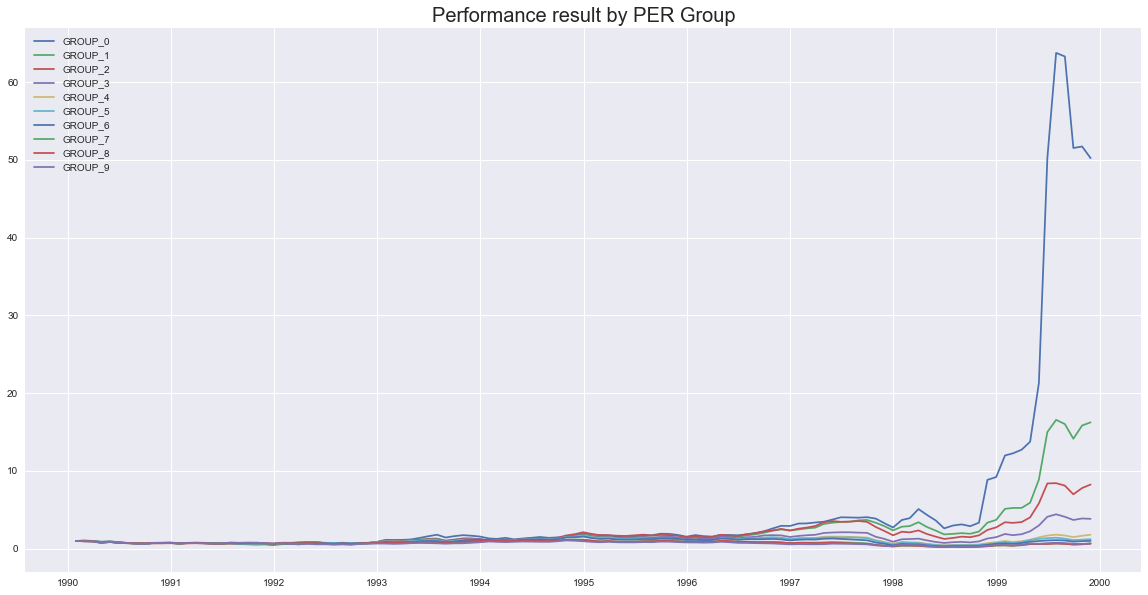

In [16]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

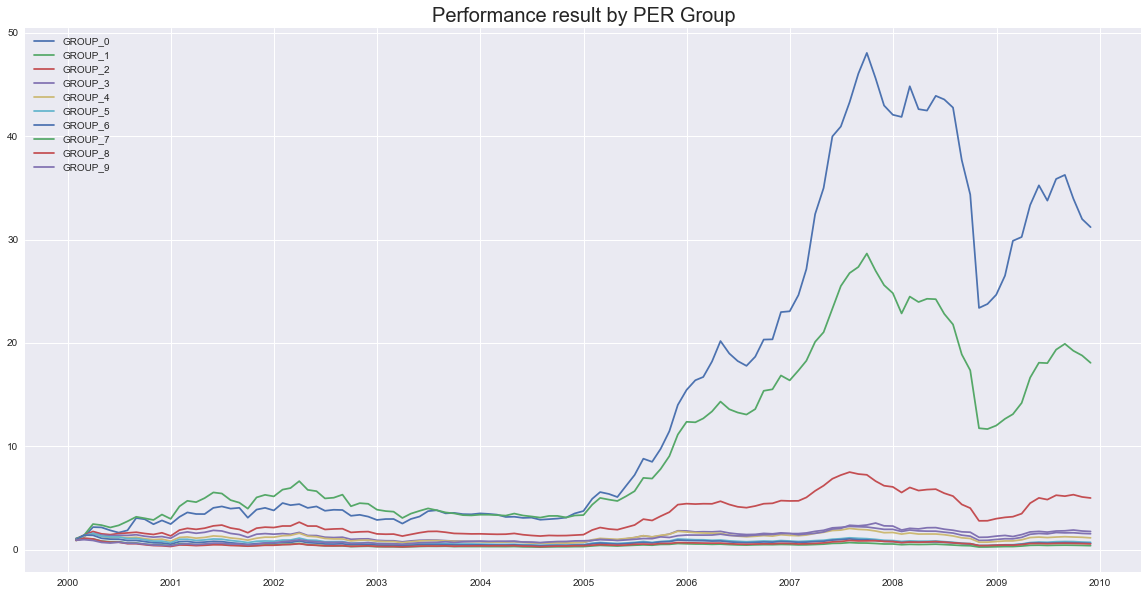

In [17]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

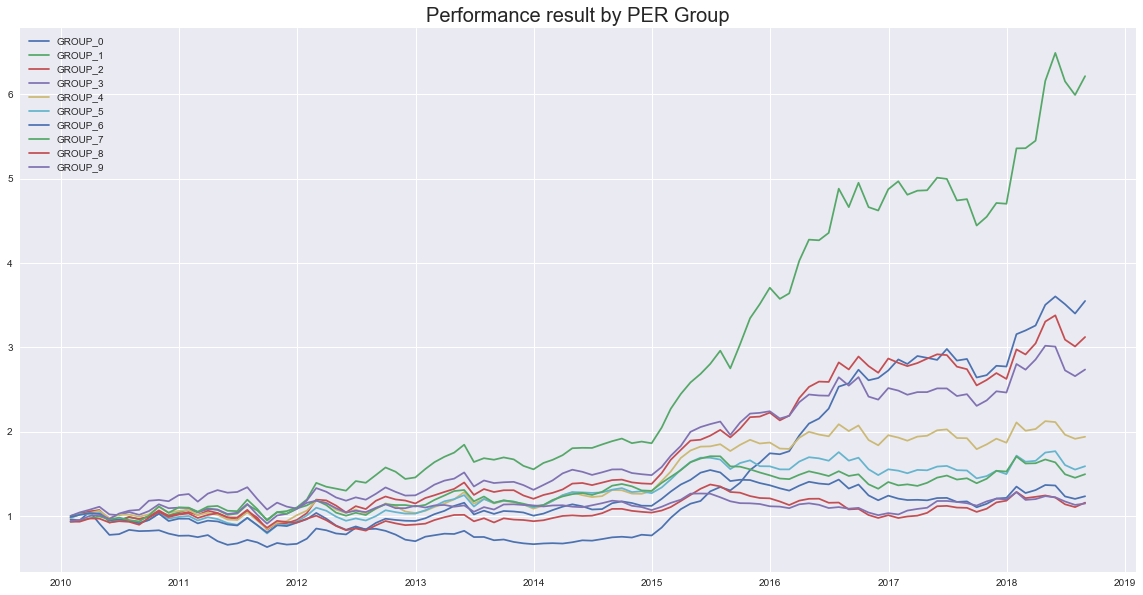

In [18]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

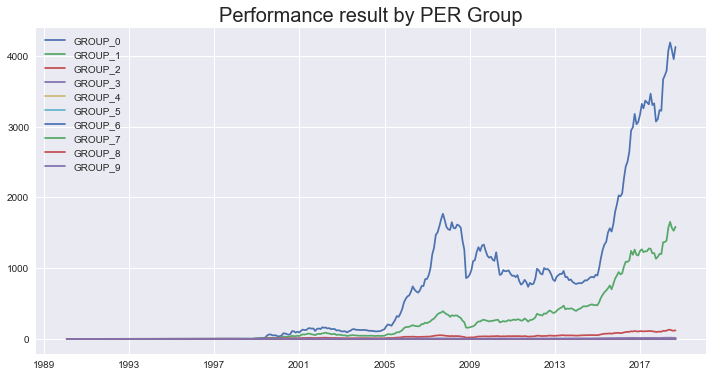

In [19]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

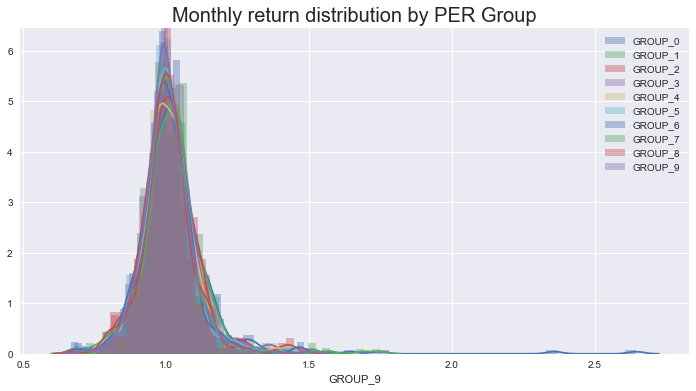

In [21]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [22]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000
mean,1.034,1.027,1.019,1.013,1.008,1.005,1.004,1.002,1.002,1.004
std,0.160,0.112,0.101,0.096,0.095,0.095,0.096,0.093,0.090,0.087
min,0.681,0.677,0.693,0.680,0.666,0.678,0.668,0.668,0.675,0.705
25%,0.965,0.968,0.966,0.961,0.956,0.958,0.955,0.953,0.951,0.959
50%,1.014,1.021,1.012,1.004,1.003,1.001,0.998,0.999,0.999,0.998
75%,1.075,1.068,1.066,1.057,1.054,1.050,1.046,1.048,1.046,1.047
max,2.643,1.749,1.446,1.444,1.442,1.488,1.483,1.573,1.492,1.508
